Adapted from https://github.com/estimate/pandas-exercises

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def side_by_side(*objs, **kwds):
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print pd.formats.printing.adjoin(space, *reprs)

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

Series
======

In [2]:
np.random.randn(5)

array([ 1.28613583, -1.8101942 ,  0.8146967 ,  0.15612694,  1.24261073])

In [3]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(np.random.randn(5), index=labels)
s

a    1.084043
b   -0.016019
c    1.857771
d   -1.583148
e    1.041377
dtype: float64

In [4]:
'b' in s

True

In [5]:
s['b']

-0.016018976103740146

In [6]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [7]:
s

a    1.084043
b   -0.016019
c    1.857771
d   -1.583148
e    1.041377
dtype: float64

In [8]:
mapping = s.to_dict()
mapping

{'a': 1.0840434268114549,
 'b': -0.016018976103740146,
 'c': 1.8577711729464179,
 'd': -1.5831475841093166,
 'e': 1.0413769572464304}

In [11]:
s = pd.Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b   -0.016019
e    1.041377
a    1.084043
d   -1.583148
f         NaN
dtype: float64

In [13]:
s[pd.notnull(s)]

b   -0.016019
e    1.041377
a    1.084043
d   -1.583148
dtype: float64

In [14]:
s.dropna()

b   -0.016019
e    1.041377
a    1.084043
d   -1.583148
dtype: float64

In [15]:
s * 2

b   -0.032038
e    2.082754
a    2.168087
d   -3.166295
f         NaN
dtype: float64

In [16]:
s[:3]

b   -0.016019
e    1.041377
a    1.084043
dtype: float64

In [17]:
s.index

Index([u'b', u'e', u'a', u'd', u'f'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [19]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

,a,b,c,d
0,-0.848690,foo,0.131127,0
1,-1.107928,bar,-0.703635,1
2,-0.983092,foo,0.848839,2
3,0.118038,bar,2.057203,3
4,-0.444245,foo,-0.661794,4
5,0.078918,bar,-1.016432,5


In [20]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [21]:
df[:3]

,a,b,c,d
0,-0.848690,foo,0.131127,0
1,-1.107928,bar,-0.703635,1
2,-0.983092,foo,0.848839,2


In [22]:
df[:-2]

,a,b,c,d
0,-0.848690,foo,0.131127,0
1,-1.107928,bar,-0.703635,1
2,-0.983092,foo,0.848839,2
3,0.118038,bar,2.057203,3


In [23]:
df[-2:]   # the last 2 rows

,a,b,c,d
4,-0.444245,foo,-0.661794,4
5,0.078918,bar,-1.016432,5


In [24]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='|S3')

In [25]:
df.xs(0)   # returning the first row

a    -0.84869
b         foo
c    0.131127
d           0
Name: 0, dtype: object

In [26]:
df.ix[2]    # does equal thing as above. In this case, 3rd row. 

a   -0.983092
b         foo
c    0.848839
d           2
Name: 2, dtype: object

In [27]:
df.ix[2, 'b']

'foo'

In [28]:
df.get_value(2, 'b')

'foo'

In [29]:
timeit df.ix[2, 'b']

The slowest run took 7.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.3 µs per loop


In [30]:
timeit df.get_value(2, 'b')

The slowest run took 10.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.12 µs per loop


In [31]:
df.ix[2:4, 'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [32]:
df.ix[2:4, ['b', 'c']]

,b,c
2,foo,0.848839
3,bar,2.057203
4,foo,-0.661794


In [33]:
df.ix[2:4, 'b':'c']   # slices by column - essentially the same as above.

,b,c
2,foo,0.848839
3,bar,2.057203
4,foo,-0.661794


In [34]:
df.ix[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

,b,c,d
0,foo,0.131127,0
2,foo,0.848839,2
4,foo,-0.661794,4


In [35]:
df['c'] > 0

0     True
1    False
2     True
3     True
4    False
5    False
Name: c, dtype: bool

In [36]:
df.ix[df['c'] > 0]   # boolean arrays

,a,b,c,d
0,-0.848690,foo,0.131127,0
2,-0.983092,foo,0.848839,2
3,0.118038,bar,2.057203,3


In [37]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [38]:
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [42]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=pd.date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,0.153456,foo,-0.590844
2000-01-02,-1.677967,bar,-0.327032
2000-01-03,-1.290512,foo,-1.151048
2000-01-04,-0.937034,bar,-1.212988
2000-01-05,-0.435035,foo,-0.036465
2000-01-06,0.055260,bar,0.042183


In [43]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.325929,foo,0.750764,NaN
1,-0.119996,bar,0.000940,NaN
2,-0.734475,foo,0.998593,NaN
3,-1.203233,bar,-0.105186,NaN
4,2.053552,foo,0.309077,NaN
5,-0.698078,bar,-0.563166,NaN


In [44]:
pd.isnull(df)

,a,b,c,d
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True


Creation from nested dicts
--------------------------

These arise naturally in Python code

In [46]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()   # sorted cols: bar, baz, foo
data

{'bar': {'a': -0.8278778864744404,
  'b': -0.35541280153822946,
  'c': 0.9078062885168281,
  'd': -0.1172205510656441},
 'baz': {'a': -0.5060069523583954,
  'b': 0.5693577295897921,
  'c': 0.5355059415235814,
  'd': 0.018681004262539526},
 'foo': {'a': -1.0863826758862487,
  'b': 0.46926938134984325,
  'c': 1.5293461977408913,
  'd': 1.1587672747193771}}

In [47]:
del data ['foo']['c']   # delete an entry by index key (col) and row.

In [48]:
pd.DataFrame(data)   # pass a dict 

,bar,baz,foo
a,-0.827878,-0.506007,-1.086383
b,-0.355413,0.569358,0.469269
c,0.907806,0.535506,NaN
d,-0.117221,0.018681,1.158767


Data alignment
==============

In [49]:
close_px = pd.read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [50]:
!head -n 10 stock_data.csv

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [52]:
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32


In [57]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [58]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [59]:
s1.add(s2, fill_value=0)

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [60]:
(s1 + s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL, dtype: float64

In [61]:
df = close_px.ix[-10:, :3]
df

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50
2011-10-10,10.09,388.81,16.14
2011-10-11,10.30,400.29,16.14
2011-10-12,10.05,402.19,16.40
2011-10-13,10.10,408.43,16.22
2011-10-14,10.26,422.00,16.60


In [62]:
side_by_side(s1.reindex(s2.index), s2)   # align indexes of s1 and s2. Print 2 objects alongside each other.

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [63]:
side_by_side(s1.ix[s2.index], s2)   # same as above, supported in newer version of 0.12 ipython.

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [64]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [65]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

In [66]:
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [67]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [68]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [69]:
df + df2

,AAPL,IBM,MSFT
2011-10-03,NaN,346.58,49.06
2011-10-04,NaN,NaN,NaN
2011-10-05,NaN,353.70,51.78
2011-10-06,NaN,NaN,NaN
2011-10-07,NaN,364.78,52.50
2011-10-10,NaN,NaN,NaN
2011-10-11,NaN,370.00,54.00
2011-10-12,NaN,NaN,NaN
2011-10-13,NaN,373.64,54.36
2011-10-14,NaN,NaN,NaN


In [70]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


Transposing: no copy if all columns are same type
-------------------------------------------------

In [71]:
df[:5].T

,2011-10-03 00:00:00,2011-10-04 00:00:00,2011-10-05 00:00:00,2011-10-06 00:00:00,2011-10-07 00:00:00
AAPL,374.60,372.50,378.25,377.37,369.80
IBM,173.29,174.74,176.85,181.69,182.39
MSFT,24.53,25.34,25.89,26.34,26.25


Columns can be any type
-----------------------

In [72]:
n = 10
foo = pd.DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = pd.date_range('1/1/2000', periods=n)
foo

,floats,ints,strings,bools,objects
0,0.190906,0,foo,True,2000-01-01
1,-0.945461,1,bar,False,2000-01-02
2,-0.706659,2,foo,False,2000-01-03
3,0.068337,3,bar,True,2000-01-04
4,0.734483,4,foo,True,2000-01-05
5,-1.416421,5,bar,False,2000-01-06
6,-1.280230,6,foo,False,2000-01-07
7,0.097477,7,bar,True,2000-01-08
8,1.041905,8,foo,True,2000-01-09
9,0.164735,9,bar,True,2000-01-10


In [73]:
foo.dtypes

floats            float64
ints                int64
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [76]:
foo.T.T

,floats,ints,strings,bools,objects
0,0.190906,0,foo,True,2000-01-01 00:00:00
1,-0.945461,1,bar,False,2000-01-02 00:00:00
2,-0.706659,2,foo,False,2000-01-03 00:00:00
3,0.0683365,3,bar,True,2000-01-04 00:00:00
4,0.734483,4,foo,True,2000-01-05 00:00:00
5,-1.41642,5,bar,False,2000-01-06 00:00:00
6,-1.28023,6,foo,False,2000-01-07 00:00:00
7,0.0974773,7,bar,True,2000-01-08 00:00:00
8,1.04191,8,foo,True,2000-01-09 00:00:00
9,0.164735,9,bar,True,2000-01-10 00:00:00


In [77]:
foo.T.T.dtypes

floats     object
ints       object
strings    object
bools      object
objects    object
dtype: object

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [78]:
df.apply(np.mean)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [79]:
df.mean()   # same as above.   df.mean? to look up the function usage.

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [80]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [81]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [82]:
df.apply(np.mean, axis=1)   # same as above.

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

You can get as fancy as you want

In [84]:
close_px.head()    # Output: 1000 rows.

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32


In [85]:
close_px.AAPL     # For easier typing, after dot ., use tab to select the name of the stock.

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
2007-11-05    186.18
2007-11-06    191.79
2007-11-07    186.30
2007-11-08    175.47
2007-11-09    165.37
2007-11-12    153.76
2007-11-13    169.96
2007-11-14    166.11
2007-11-15    164.30
2007-11-16    166.39
2007-11-19    163.95
2007-11-20    168.85
2007-11-21    168.46
2007-11-23    171.54
2007-11-26    172.54
2007-11-27    174.81
2007-11-28    180.22
2007-11-29    184.29
2007-11-30    182.22
2007-12-03    178.86
2007-12-04    179.81
2007-12-05    185.50
2007-12-06    189.95
2007-12-07    194.30
2007-12-10    194.21
               ...  
2011-09-02    374.05
2011-09-06    379.74
2011-09-07    383.93
2011-09-08    384.14
2011-09-09    377.48
2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27   

In [86]:
close_px.AAPL.idxmax() # gives index of its maximum value.

Timestamp('2011-10-14 00:00:00')

In [93]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

AAPL    52.20
IBM     17.24
MSFT     2.74
dtype: float64

In [94]:
np.log(close_px)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,3.621938,5.220842,3.539799,4.670771,4.045329,3.458837,4.184642,7.340174,4.448633
2007-10-30,3.595393,5.231109,3.537766,4.664853,4.042876,3.487375,4.186620,7.333689,4.421848
2007-10-31,3.605226,5.246761,3.554491,4.682224,4.048301,3.521644,4.184947,7.345610,4.431174
2007-11-01,3.561614,5.233459,3.534270,4.660794,4.040416,3.528417,4.166820,7.318831,4.392472
2007-11-02,3.578786,5.235750,3.534270,4.668990,4.042174,3.528417,4.174849,7.319633,4.386019
2007-11-05,3.561614,5.226714,3.530763,4.658521,4.037774,3.519573,4.171923,7.314666,4.382901
2007-11-06,3.579065,5.256401,3.530470,4.656528,4.039536,3.510650,4.181897,7.326643,4.413525
2007-11-07,3.548467,5.227358,3.502550,4.641406,4.028739,3.485845,4.166045,7.296834,4.381527
2007-11-08,3.555348,5.167468,3.501043,4.595625,4.039360,3.463859,4.182050,7.296257,4.406719
2007-11-09,3.540089,5.108185,3.484619,4.538817,4.048126,3.434310,4.181745,7.281867,4.377516


Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

In [99]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']]#.plot()    # Can pass a list of col names to get items, so you don't have to use ix.

,AAPL,IBM,MSFT,XOM
2007-10-29,185.09,106.78,31.78,85.51
2007-10-30,187.00,106.15,32.70,83.25
2007-10-31,189.95,108.01,33.84,84.03
2007-11-01,187.44,105.72,34.07,80.84
2007-11-02,187.87,106.59,34.07,80.32
2007-11-05,186.18,105.48,33.77,80.07
2007-11-06,191.79,105.27,33.47,82.56
2007-11-07,186.30,103.69,32.65,79.96
2007-11-08,175.47,99.05,31.94,82.00
2007-11-09,165.37,93.58,31.01,79.64


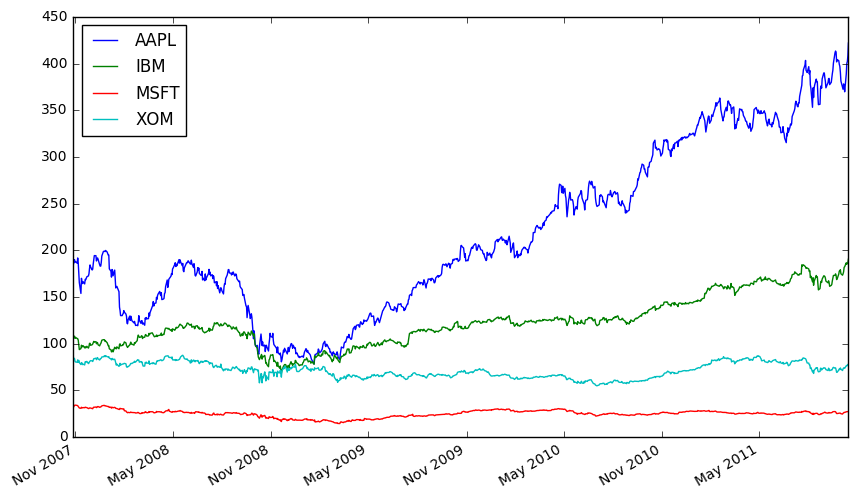

In [117]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot() 

In [30]:
close_px.ix[-1]

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00

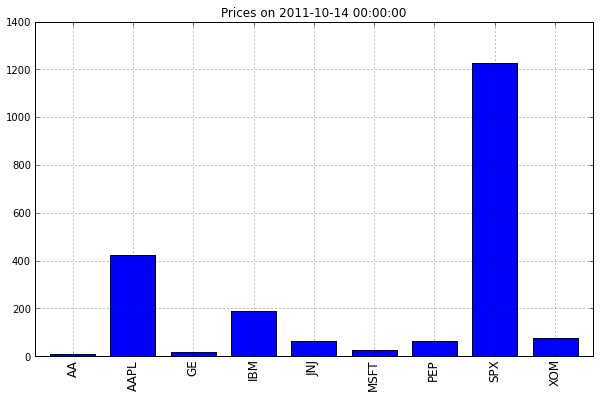

In [29]:
close_px.ix[-1].plot(kind='bar')    # the last row of the data.
title('Prices on %s' % close_px.index[-1])
axhline(0)

Hierarchical indexing
---------------------

In [44]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [45]:
hdf.ix['foo']

In [46]:
hdf.ix['foo'] = 0
hdf

In [47]:
hdf.ix['foo', 'three']

Stacking and unstacking
-----------------------

In [48]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [49]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [50]:
df.unstack()['B']

GroupBy
=======

In [51]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [52]:
for key, group in df.groupby('A'):
    print key
    print group

In [53]:
df.groupby('A')['C'].describe().T

In [54]:
df.groupby('A').mean()

In [55]:
for key, group in df.groupby('A'):
    print key
    print group

In [56]:
df.groupby(['A', 'B']).mean()

In [57]:
df.groupby(['A', 'B'], as_index=False).mean()

GroupBy example: linear regression by group
-------------------------------------------

In [58]:
import scikits.statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = sm.OLS(rets['MSFT'], rets.ix[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

In [59]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

In [60]:
beta_by_ym.unstack(0)['AAPL']

GroupBy with hierarchical indexing
----------------------------------

In [61]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [62]:
df.groupby(level=0, axis=0).mean()

In [63]:
df.stack()

In [64]:
df.stack().mean(1).unstack()

In [65]:
# could also have done
df.groupby(level=1, axis=1).mean()